In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pool_functions import combine, totals, upset_counter, points_per_win, sum_totals


In [28]:
#create list of result files
results_csv = ['week1_results.csv', 'week2_results.csv', 'week3_results.csv', 'week4_results.csv',
 'week5_results.csv', 'week6_results.csv', 'week7_results.csv', 'week8_results.csv', 'week9_results.csv']

#create results dictionary 
results = {'week1': 1, 'week2': 2, 'week3': 3, 'week4': 4, 'week5': 5, 'week6': 6, 'week7': 7, 'week8': 8, 'week9': 9}

#read results files and add them to results dictionary
i = 0
for week in results: 
    results[week] = combine(pd.read_csv(results_csv[i]))
    i = i + 1
    

In [29]:
#calculate total points and picks
week1_stats = totals(results['week1'])
week2_stats = totals(results['week2'])
week3_stats = totals(results['week3'])
week4_stats = totals(results['week4'])
week5_stats = totals(results['week5'])
week6_stats = totals(results['week6'])
week7_stats = totals(results['week7'])
week8_stats = totals(results['week8'])
week9_stats = totals(results['week9'])


#create season total df 
season_totals = pd.DataFrame(week1_stats.copy(), columns=['Score', 'Game Count'])
season_totals['Week 1 Rank'] = season_totals['Score'].rank(ascending=False, method='min')

#use sum_total function to add points for season total 

sum_totals(season_totals, week2_stats, 'Week 2 Rank')
sum_totals(season_totals, week3_stats, 'Week 3 Rank')
sum_totals(season_totals, week4_stats, 'Week 4 Rank')
sum_totals(season_totals, week5_stats, 'Week 5 Rank')
sum_totals(season_totals, week6_stats, 'Week 6 Rank')
sum_totals(season_totals, week7_stats, 'Week 7 Rank')
sum_totals(season_totals, week8_stats, 'Week 8 Rank')
sum_totals(season_totals, week8_stats, 'Week 9 Rank')

#caluculate the position change from the previous week 
season_totals['Rank Change Value'] = round(season_totals[season_totals.columns[len(season_totals.columns)-1]]-season_totals[season_totals.columns[len(season_totals.columns)-2]], 0)

In [33]:
best_worst_dic = {'Week': 1, 'Highest Score': week1_stats['Score'].idxmax(), 'Best Selections': week1_stats['Pick Percentage'].idxmax(), 'Correct Pick Percentage': week1_stats['Pick Percentage'].max(), 'Worst Selections': week1_stats['Pick Percentage'].idxmin(), 'Worst Pick Percentage': week1_stats['Pick Percentage'].min()}
best_worst = pd.DataFrame(best_worst_dic, index=[0])
best_worst.loc[len(best_worst.index)] = [2, week2_stats['Score'].idxmax(), week2_stats['Pick Percentage'].idxmax(), week2_stats['Pick Percentage'].max(),  week2_stats['Pick Percentage'].idxmin(), week2_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [3, week3_stats['Score'].idxmax(), week3_stats['Pick Percentage'].idxmax(), week3_stats['Pick Percentage'].max(),  week3_stats['Pick Percentage'].idxmin(), week3_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [4, week4_stats['Score'].idxmax(), week4_stats['Pick Percentage'].idxmax(), week4_stats['Pick Percentage'].max(),  week4_stats['Pick Percentage'].idxmin(), week4_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [5, week5_stats['Score'].idxmax(), week5_stats['Pick Percentage'].idxmax(), week5_stats['Pick Percentage'].max(),  week5_stats['Pick Percentage'].idxmin(), week5_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [6, week6_stats['Score'].idxmax(), week6_stats['Pick Percentage'].idxmax(), week6_stats['Pick Percentage'].max(),  week6_stats['Pick Percentage'].idxmin(), week6_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [7, week7_stats['Score'].idxmax(), week7_stats['Pick Percentage'].idxmax(), week7_stats['Pick Percentage'].max(),  week7_stats['Pick Percentage'].idxmin(), week7_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [8, week8_stats['Score'].idxmax(), week8_stats['Pick Percentage'].idxmax(), week8_stats['Pick Percentage'].max(),  week8_stats['Pick Percentage'].idxmin(), week8_stats['Pick Percentage'].min()]
best_worst.loc[len(best_worst.index)] = [9, week9_stats['Score'].idxmax(), week9_stats['Pick Percentage'].idxmax(), week9_stats['Pick Percentage'].max(),  week9_stats['Pick Percentage'].idxmin(), week9_stats['Pick Percentage'].min()]

best_worst

,Week,Highest Score,Best Selections,Correct Pick Percentage,Worst Selections,Worst Pick Percentage
0,1,Kathy Zwartz,Kathy Zwartz,81.25,MattWojtanek,37.50
1,2,Ellieisawesome1,Ellieisawesome1,87.50,UrBoiJZ,31.25
2,3,Lizzy_Z,Lizzy_Z,87.50,Wild Bill,31.25
3,4,Michael Zwartz,Michael Zwartz,75.00,Ellieisawesome1,37.50
4,5,Ken,Bob Z,81.25,Lizzy_Z,43.75
5,6,Team Boylan,Team Boylan,78.57,abfarias,42.86
6,7,taz7611,PBW,71.43,Michael Zwartz,28.57
7,8,Bob Z,Bob Z,86.67,Michael Zwartz,40.00
8,9,Kathy Zwartz,Kathy Zwartz,61.54,abfarias,30.77


In [36]:
season_totals['Rank Change'] = 0
season_totals[''] = " "

i = 0
while i < len(season_totals.index): 
    if season_totals['Rank Change Value'][i] < 0:
        season_totals.loc[season_totals.index[i], ''] = u'\u2191' #up arrow
        #season_totals.loc[season_totals.index[i], ''] = 'up' #up arrow
        season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    elif season_totals['Rank Change Value'][i] == 0: 
        season_totals.loc[season_totals.index[i], ''] = "--"
        season_totals.loc[season_totals.index[i], 'Rank Change'] = 0
    else:
       season_totals.loc[season_totals.index[i], ''] = u'\u2193' #down arrow
       #season_totals.loc[season_totals.index[i], ''] = 'down' #down arrow
       season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    i = i+ 1

In [37]:
tots = season_totals[['Score', 'Game Count', 'Week 7 Rank', 'Rank Change', '']].sort_values(['Week 7 Rank'])

tots.head()

,Score,Game Count,Week 7 Rank,Rank Change,
Player,,,,,
Ken,797,86,1.0,0,--
Bob Z,810,97,2.0,0,--
Lindsey,729,83,3.0,0,--
Zapp,711,84,4.0,3,↓
PBW,754,88,5.0,0,--


In [38]:
week9_stats['Week 9 Rank'] = week9_stats['Score'].rank(ascending=False)
week9_stats.sort_values(['Max Score'], ascending=False).head()

,Score,Game Count,Max Score,Pick Percentage,Points per win,Week 9 Rank
Player,,,,,,
Lindsey,75,7,117,53.85,10.71,4.0
PBW,82,7,116,53.85,11.71,2.0
Kathy Zwartz,84,8,115,61.54,10.50,1.0
Shaner,68,7,109,53.85,9.71,8.0
Michael Zwartz,72,6,104,46.15,12.00,7.0


In [39]:
#upset count
upset_count1 = upset_counter(results['week1'])
upset_count2 = upset_counter(results['week2'])
upset_count3 = upset_counter(results['week3'])
upset_count4 = upset_counter(results['week4'])
upset_count5 = upset_counter(results['week5'])
upset_count6 = upset_counter(results['week6'])
upset_count7 = upset_counter(results['week7'])
upset_count8 = upset_counter(results['week8'])
upset_count9 = upset_counter(results['week9'])

Total of  6 upsets this week. With  1 being big dogs.
Total of  5 upsets this week. With  1 being big dogs.
Total of  9 upsets this week. With  1 being big dogs.
Total of  5 upsets this week. With  0 being big dogs.
Total of  4 upsets this week. With  2 being big dogs.
Total of  7 upsets this week. With  2 being big dogs.
Total of  6 upsets this week. With  1 being big dogs.
Total of  4 upsets this week. With  0 being big dogs.
Total of  3 upsets this week. With  1 being big dogs.


In [18]:
hi = sorted(upset_count1[1])

In [40]:
max1 = week1_stats['Game Count'].nlargest(2)
min1 = week1_stats.min()
med1 = week6_stats['Game Count'].median()
max1

Player
Kathy Zwartz    13
Bob Z           11
Name: Game Count, dtype: int64

In [41]:
tots = {'Week': 1, 'Correct Pick Percentage': round(week1_stats['Pick Percentage'].mean(), 2), 'Avg Points per Win': points_per_win(week1_stats), 'Winner Pts': week1_stats['Score'].max(), 'Worst Player Pts': week1_stats['Score'].min(), 'Number of Upsets': upset_count1[0]}
weekly_stats = pd.DataFrame(tots, index=[0])
weekly_stats.loc[len(weekly_stats.index)] = [2, round(week2_stats['Pick Percentage'].mean(), 2), points_per_win(week2_stats), week2_stats['Score'].max(), week2_stats['Score'].min(), upset_count2[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [3, round(week3_stats['Pick Percentage'].mean(), 2), points_per_win(week3_stats), week3_stats['Score'].max(), week3_stats['Score'].min(), upset_count3[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [4, round(week4_stats['Pick Percentage'].mean(), 2), points_per_win(week4_stats), week4_stats['Score'].max(), week4_stats['Score'].min(), upset_count4[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [5, round(week5_stats['Pick Percentage'].mean(), 2), points_per_win(week5_stats), week5_stats['Score'].max(), week5_stats['Score'].min(), upset_count5[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [6, round(week6_stats['Pick Percentage'].mean(), 2), points_per_win(week6_stats), week6_stats['Score'].max(), week6_stats['Score'].min(), upset_count6[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [7, round(week7_stats['Pick Percentage'].mean(), 2), points_per_win(week7_stats), week7_stats['Score'].max(), week7_stats['Score'].min(), upset_count7[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [8, round(week8_stats['Pick Percentage'].mean(), 2), points_per_win(week8_stats), week8_stats['Score'].max(), week8_stats['Score'].min(), upset_count8[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [9, round(week9_stats['Pick Percentage'].mean(), 2), points_per_win(week9_stats), week9_stats['Score'].max(), week9_stats['Score'].min(), upset_count9[0]] 

weekly_stats



,Week,Correct Pick Percentage,Avg Points per Win,Winner Pts,Worst Player Pts,Number of Upsets
0,1.0,51.97,7.41,97.0,45.0,6.0
1,2.0,52.96,9.05,114.0,48.0,5.0
2,3.0,50.00,8.53,107.0,40.0,9.0
3,4.0,57.57,8.78,108.0,51.0,5.0
4,5.0,61.84,9.12,117.0,58.0,4.0
5,6.0,53.76,8.80,96.0,43.0,7.0
6,7.0,58.65,9.76,103.0,41.0,6.0
7,8.0,59.30,9.80,117.0,68.0,4.0
8,9.0,43.72,11.04,84.0,37.0,3.0


Text(0.5, 0, 'Week')

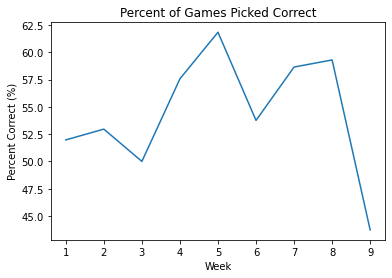

In [42]:
plt.plot(weekly_stats['Week'], weekly_stats['Correct Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")

In [43]:
#create weely totals df to track totals each week
weekly_totals = pd.concat([week1_stats.rename(columns={"Score": "Week 1 Score", "Game Count": "Week 1 Game Count"}),
 week2_stats.rename(columns={"Score": "Week 2 Score", "Game Count": "Week 2 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week3_stats.rename(columns={"Score": "Week 3 Score", "Game Count": "Week 3 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week4_stats.rename(columns={"Score": "Week 4 Score", "Game Count": "Week 4 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week5_stats.rename(columns={"Score": "Week 5 Score", "Game Count": "Week 5 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week6_stats.rename(columns={"Score": "Week 6 Score", "Game Count": "Week 6 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week7_stats.rename(columns={"Score": "Week 7 Score", "Game Count": "Week 7 Game Count"})], axis=1)

weekly_totals.head()

,Week 1 Score,Week 1 Game Count,Max Score,Pick Percentage,Points per win,Week 2 Score,Week 2 Game Count,Max Score,Pick Percentage,Points per win,...,Week 6 Score,Week 6 Game Count,Max Score,Pick Percentage,Points per win,Week 7 Score,Week 7 Game Count,Max Score,Pick Percentage,Points per win
Player,,,,,,,,,,,,,,,,,,,,,
abfarias,52,7,52,43.75,7.43,74,7,74,43.75,10.57,...,46,6,46,42.86,7.67,85,8,88,57.14,10.62
Bob Z,72,11,72,68.75,6.55,86,10,86,62.50,8.60,...,72,8,72,57.14,9.00,79,9,89,64.29,8.78
Ellieisawesome1,61,8,61,50.00,7.62,114,14,114,87.50,8.14,...,54,6,54,42.86,9.00,80,9,93,64.29,8.89
JJapcon,60,8,60,50.00,7.50,81,9,81,56.25,9.00,...,51,6,51,42.86,8.50,78,9,87,64.29,8.67
Kathy Zwartz,97,13,97,81.25,7.46,79,9,79,56.25,8.78,...,59,7,59,50.00,8.43,72,6,75,42.86,12.00


In [ ]:
#find individual weekly statistics: avg pick percent, median, std
player_totals = pd.DataFrame()
for player, row in weekly_totals.iterrows(): 
    player_totals = player_totals.append(weekly_totals.loc[player]['Pick Percentage'].describe().apply("{0:.2f}".format))



In [45]:
player_totals[['mean', 'std', 'min', 'max']].sort_values(['mean'], ascending=False)

,mean,std,min,max
Bob Z,65.56,8.52,56.25,81.25
Zapp,61.10,10.03,43.75,75.00
PBW,59.57,11.29,43.75,71.43
Ken,59.44,11.55,50.00,81.25
Lindsey,58.04,10.22,42.86,75.00
Wild Bill,57.78,13.29,31.25,71.43
Lizzy_Z,57.53,15.18,43.75,87.50
Ellieisawesome1,56.38,16.78,37.50,87.50
Kathy Zwartz,56.12,12.13,42.86,81.25
Shaner,55.74,8.70,43.75,68.75
